# 3   Processing Raw Text

The most important source of texts is undoubtedly the Web. It's convenient to have existing text collections to explore, such as the corpora we saw in the previous chapters. However, you probably have your own text sources in mind, and need to learn how to access them.

The goal of this chapter is to answer the following questions:

1) How can we write programs to access text from local files and from the web, in order to get hold of an unlimited range of language material?

2) How can we split documents up into individual words and punctuation symbols, so we can carry out the same kinds of analysis we did with text corpora in earlier chapters?

3) How can we write programs to produce formatted output and save it in a file?

In order to address these questions, we will be covering key concepts in NLP, including tokenization and stemming. Along the way you will consolidate your Python knowledge and learn about strings, files, and regular expressions. Since so much text on the web is in HTML format, we will also see how to dispense with markup.

In [1]:
from __future__ import division  # Python 2 users only
import nltk, re, pprint
from nltk import word_tokenize

# 3.1   Accessing Text from the Web and from Disk

# Electronic Books

In [2]:
from __future__ import division  # Python 2 users only
import nltk, re, pprint
from nltk import word_tokenize

In [3]:
from urllib import request
url = "http://www.gutenberg.org/files/2554/2554-0.txt"
response = request.urlopen(url)
raw = response.read().decode('utf-8-sig')
type(raw)


str

In [4]:
len(raw)


1176811

In [5]:
raw[:75]

'The Project Gutenberg eBook of Crime and Punishment, by Fyodor Dostoevsky\r\n'

Tokenization: The process of creating strings and puncuation from raw text

In [6]:
tokens = word_tokenize(raw)
print(type(tokens))
tokens[:15]


<class 'list'>


['The',
 'Project',
 'Gutenberg',
 'eBook',
 'of',
 'Crime',
 'and',
 'Punishment',
 ',',
 'by',
 'Fyodor',
 'Dostoevsky',
 'This',
 'eBook',
 'is']

In [7]:
len(tokens)

257058

In [8]:
print(raw)

The Project Gutenberg eBook of Crime and Punishment, by Fyodor Dostoevsky

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.

Title: Crime and Punishment

Author: Fyodor Dostoevsky

Translator: Constance Garnett

Release Date: March, 2001 [eBook #2554]
[Most recently updated: August 6, 2021]

Language: English

Character set encoding: UTF-8

Produced by: John Bickers, Dagny and David Widger

*** START OF THE PROJECT GUTENBERG EBOOK CRIME AND PUNISHMENT ***




CRIME AND PUNISHMENT

By Fyodor Dostoevsky



Translated By Constance Garnett




TRANSLATOR’S PREFACE

A few words about Dostoevsky himself m

In [9]:
text = nltk.Text(tokens)
type(text)

nltk.text.Text

In [10]:
text[1024:1062]

['insight',
 'impresses',
 'us',
 'as',
 'wisdom',
 '...',
 'that',
 'wisdom',
 'of',
 'the',
 'heart',
 'which',
 'we',
 'seek',
 'that',
 'we',
 'may',
 'learn',
 'from',
 'it',
 'how',
 'to',
 'live',
 '.',
 'All',
 'his',
 'other',
 'gifts',
 'came',
 'to',
 'him',
 'from',
 'nature',
 ',',
 'this',
 'he',
 'won',
 'for']

In [11]:
text.collocations()

Katerina Ivanovna; Pyotr Petrovitch; Pulcheria Alexandrovna; Avdotya
Romanovna; Rodion Romanovitch; Marfa Petrovna; Sofya Semyonovna; old
woman; Project Gutenberg-tm; Porfiry Petrovitch; Amalia Ivanovna;
great deal; young man; Nikodim Fomitch; Project Gutenberg; Ilya
Petrovitch; Andrey Semyonovitch; Hay Market; Dmitri Prokofitch; Good
heavens


In [12]:
raw.find("PART I") #find the start of what you want

5574

In [13]:
print(raw.rfind("END OF THE PROJECT GUTENBERG EBOOK CRIME AND PUNISHMENT")) #find the end of what you want

1158052


In [14]:
raw = raw[5338:1157743] #selects only that information

In [15]:
raw.find("PART I")#We overwrite raw with this slice, so now it begins 
#with "PART I" and goes up to (but not including) the phrase that marks the end of the content.

236

# Dealing with HTML

In [48]:
url = "http://news.bbc.co.uk/2/hi/health/2284783.stm" #For fun we'll pick a BBC News story 
#called Blondes to die out in 200 years, 
#an urban legend passed along by the BBC as established scientific fact
html = request.urlopen(url).read().decode('utf-8-sig')
html[:60]

'<!doctype html public "-//W3C//DTD HTML 4.0 Transitional//EN'

In [17]:
print(html) # to see the HTML content in all its glory, including meta tags, 
#an image map, JavaScript, forms, and tables.

<!doctype html public "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/loose.dtd">
<html>
<head>
<title>BBC NEWS | Health | Blondes 'to die out in 200 years'</title>
<meta name="keywords" content="BBC, News, BBC News, news online, world, uk, international, foreign, british, online, service">
<meta name="OriginalPublicationDate" content="2002/09/27 11:51:55">
<meta name="UKFS_URL" content="/1/hi/health/2284783.stm">
<meta name="IFS_URL" content="/2/hi/health/2284783.stm">
<meta name="HTTP-EQUIV" content="text/html;charset=iso-8859-1">
<meta name="Headline" content="Blondes 'to die out in 200 years'">
<meta name="Section" content="Health">
<meta name="Description" content="Natural blondes are an endangered species and will die out by 2202, a study suggests.">
<!-- GENMaps-->
<map name="banner">
<area alt="BBC NEWS" coords="7,9,167,32" href="http://news.bbc.co.uk/1/hi.html" shape="RECT">
</map>

<script src="/nol/shared/js/livestats_v1_1.js" language="JavaScript" t

In [18]:
from bs4 import BeautifulSoup #To get text out of HTML we will use a Python library called 
#BeautifulSoup, available from http://www.crummy.com/software/BeautifulSoup/:
raw = BeautifulSoup(html, 'html.parser').get_text()
tokens = word_tokenize(raw)
tokens

['BBC',
 'NEWS',
 '|',
 'Health',
 '|',
 'Blondes',
 "'to",
 'die',
 'out',
 'in',
 '200',
 "years'",
 'NEWS',
 'SPORT',
 'WEATHER',
 'WORLD',
 'SERVICE',
 'A-Z',
 'INDEX',
 'SEARCH',
 'You',
 'are',
 'in',
 ':',
 'Health',
 'News',
 'Front',
 'Page',
 'Africa',
 'Americas',
 'Asia-Pacific',
 'Europe',
 'Middle',
 'East',
 'South',
 'Asia',
 'UK',
 'Business',
 'Entertainment',
 'Science/Nature',
 'Technology',
 'Health',
 'Medical',
 'notes',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '-',
 'Talking',
 'Point',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '-',
 'Country',
 'Profiles',
 'In',
 'Depth',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '-',
 'Programmes',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '-',
 'SERVICES',
 'Daily',
 'E-mail',
 'News',
 'Ticker',
 'Mobile/PDAs',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '-',
 'Text',
 'Only',
 'Feedback',
 'Help',
 'EDITIONS',
 'Change',
 'to',
 'UK',
 'Friday',
 ',',
 '27',
 'September',
 ',',
 '2002',
 ',',
 '11:51',
 'GMT',
 '12:51'

This still contains unwanted material concerning site navigation and related stories. With some trial and error you can find the start and end indexes of the content and select the tokens of interest, and initialize a text as before.

In [19]:
tokens = tokens[110:390]
text = nltk.Text(tokens)
text.concordance('gene')

Displaying 5 of 5 matches:
hey say too few people now carry the gene for blondes to last beyond the next 
blonde hair is caused by a recessive gene . In order for a child to have blond
 have blonde hair , it must have the gene on both sides of the family in the g
ere is a disadvantage of having that gene or by chance . They do n't disappear
des would disappear is if having the gene was a disadvantage and I do not thin


# Processing Search Engine Results

The web can be thought of as a huge corpus of unannotated text. Web search engines provide an efficient means of searching this large quantity of text for relevant linguistic examples. 

**The main advantage of search engines is size:** since you are searching such a large set of documents, you are more likely to find any linguistic pattern you are interested in. Furthermore, you can make use of very specific patterns, which would only match one or two examples on a smaller example, but which might match tens of thousands of examples when run on the web. 

**A second advantage of web search engines is that they are very easy to use.** Thus, they provide a very convenient tool for quickly checking a theory, to see if it is reasonable.

Unfortunately, search engines have some significant shortcomings. 

First, **the allowable range of search patterns is severely restricted.** Unlike local corpora, where you write programs to search for arbitrarily complex patterns, search engines generally only allow you to search for individual words or strings of words, sometimes with wildcards. 

Second, **search engines give inconsistent results, and can give widely different figures when used at different times or in different geographical regions**. When content has been duplicated across multiple sites, search results may be boosted. 

Finally, **the markup in the result returned by a search engine may change unpredictably**, breaking any pattern-based method of locating particular content.

# Processing RSS (Really Simple Syndication) Feeds

The blogosphere is an important source of text, in both formal and informal registers. With the help of a Python library called the Universal Feed Parser, available from https://pypi.python.org/pypi/feedparser, we can access the content of a blog, as shown below:

In [20]:
import feedparser
llog = feedparser.parse("http://languagelog.ldc.upenn.edu/nll/?feed=atom")
llog['feed']['title']

'Language Log'

In [21]:
len(llog.entries)

13

In [22]:
post = llog.entries[2]
post.title

'Coercive Chinese censorship against Thailand'

In [23]:
content = post.content[0].value
content[:70]

'<p>"Hurting the feelings of the Chinese people", part 572</p>\n<p>From '

In [24]:
raw = BeautifulSoup(content, 'html.parser').get_text()
word_tokenize(raw)

['``',
 'Hurting',
 'the',
 'feelings',
 'of',
 'the',
 'Chinese',
 'people',
 "''",
 ',',
 'part',
 '572',
 'From',
 'AntC',
 ':',
 'Joseph',
 'Wu',
 '(',
 '吳釗燮',
 ')',
 ',',
 'Taiwan',
 "'s",
 'Foreign',
 'Minister',
 ',',
 'just',
 'gave',
 'an',
 'interview',
 'on',
 'Thai',
 'TV',
 '.',
 'I',
 'thought',
 'it',
 'a',
 'very',
 'sober',
 'assessment',
 'of',
 'the',
 'current',
 'situations',
 '(',
 'worldwide',
 ')',
 '.',
 'See',
 'Taiwan',
 'News',
 'article',
 'here',
 '.',
 'Thai',
 'TV',
 'posted',
 'it',
 'on',
 'Youtube',
 ';',
 'PRC',
 'immediately',
 'claimed',
 'it',
 '``',
 'harmed',
 'China',
 '’',
 's',
 'interests',
 'and',
 'hurt',
 'the',
 'Chinese',
 'people',
 '’',
 's',
 'feelings',
 '.',
 "''",
 'So',
 'it',
 'got',
 'taken',
 'down',
 '.',
 'It',
 'has',
 'been',
 'archived',
 'at',
 'Wayback',
 '—',
 'but',
 'I',
 'do',
 "n't",
 'know',
 'how',
 'long',
 'it',
 'will',
 'survive',
 'there',
 '.',
 'I',
 "'m",
 'totally',
 'impressed',
 'with',
 'Wu',
 "'s",
 

# Reading Local Files

In order to read a local file, we need to use Python's built-in open() function, followed by the read() method. Suppose you have a file document.txt, you can load its contents like this:

In [47]:
f = open (r'C:\Users\Dr. S Padmaja\Iris.csv')
raw = f.read()
print(raw)

Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa
10,4.9,3.1,1.5,0.1,Iris-setosa
11,5.4,3.7,1.5,0.2,Iris-setosa
12,4.8,3.4,1.6,0.2,Iris-setosa
13,4.8,3.0,1.4,0.1,Iris-setosa
14,4.3,3.0,1.1,0.1,Iris-setosa
15,5.8,4.0,1.2,0.2,Iris-setosa
16,5.7,4.4,1.5,0.4,Iris-setosa
17,5.4,3.9,1.3,0.4,Iris-setosa
18,5.1,3.5,1.4,0.3,Iris-setosa
19,5.7,3.8,1.7,0.3,Iris-setosa
20,5.1,3.8,1.5,0.3,Iris-setosa
21,5.4,3.4,1.7,0.2,Iris-setosa
22,5.1,3.7,1.5,0.4,Iris-setosa
23,4.6,3.6,1.0,0.2,Iris-setosa
24,5.1,3.3,1.7,0.5,Iris-setosa
25,4.8,3.4,1.9,0.2,Iris-setosa
26,5.0,3.0,1.6,0.2,Iris-setosa
27,5.0,3.4,1.6,0.4,Iris-setosa
28,5.2,3.5,1.5,0.2,Iris-setosa
29,5.2,3.4,1.4,0.2,Iris-setosa
30,4.7,3.2,1.6,0.2,Iris-setosa
31,4.8,3.1,1.6

In [45]:
import os
os.listdir('.')


['.anaconda',
 '.cache',
 '.conda',
 '.condarc',
 '.continuum',
 '.docker',
 '.eclipse',
 '.idlerc',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.kube',
 '.matplotlib',
 '.minikube',
 '.p2',
 '2. Accessing Text Corpora and Lexical Resources.ipynb',
 'anaconda3',
 'AppData',
 'Application Data',
 'Contacts',
 'Cookies',
 'Desktop',
 'document.txt.docx',
 'Documents',
 'Downloads',
 'eclipse',
 'eclipse-workspace',
 'Favorites',
 'IntelGraphicsProfiles',
 'Iris.csv',
 'Links',
 'Local Settings',
 'Music',
 'My Documents',
 'NetHood',
 'NLP_ NLTK_ UNIT 1 (CHAPTER 1).ipynb',
 'NLP_ NLTK_ UNIT 1 (Chapter 2).ipynb',
 'nltk demo.py',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{9d043c1d-c5fc-11ed-9314-080027ec4824}.TM.blf',
 'NTUSER.DAT{9d043c1d-c5fc-11ed-9314-080027ec4824}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{9d043c1d-c5fc-11ed-9314-080027ec4824}.TMContainer00000000000000000002.regtrans-ms',
 'ntuser.ini',
 'OneDrive',
 'Pictures',
 'PrintH

# Capturing User Input
Sometimes we want to capture the text that a user inputs when she is interacting with
our program. To prompt the user to type a line of input, call the Python function
raw_input(). After saving the input to a variable, we can manipulate it just as we have
done for other strings.


In [ ]:
 s = input("Enter some text: ")


In [ ]:
import nltk

s = input("Enter some text: ")
word_count = len(nltk.word_tokenize(s))

print("You typed", word_count, "words.")


# 3.2 Strings: Text Processing at the Lowest Level
In earlier chapters we
focused on a text as a list of words. We didn't look too closely at words and how they are handled in the programming language. By using NLTK's corpus interface we were able to ignore the files that these texts had
come from. The contents of a word, and of a file, are represented by programming languages as a fundamental
data type known as a string. In this section we explore strings in detail, and show the connection between strings,
words, texts and files.


# Basic Operations with Strings

Strings are specified using single quotes or double quotes


In [9]:
monty = 'Monty Python'
monty 


'Monty Python'

In [3]:
circus = "Monty Python's Flying Circus"
circus

"Monty Python's Flying Circus"

If a string contains a single
quote, we must backslash-escape the quote so Python knows a literal quote character is intended, or else put the
string in double quotes .

In [2]:
circus = 'Monty Python\'s Flying Circus'
circus


"Monty Python's Flying Circus"

Otherwise, the quote inside the string will be interpreted as a close quote, and the
Python interpreter will report a syntax error:

In [4]:
circus = 'Monty Python's Flying Circus' 
circus 


SyntaxError: unterminated string literal (detected at line 1) (57898329.py, line 1)

Sometimes strings go over several lines. Python provides us with various ways of entering them. In the next
example, a sequence of two strings is joined into a single string. We need to use backslash or parentheses so
that the interpreter knows that the statement is not complete after the first line.

In [5]:
couplet = "Shall I compare thee to a Summer's day?"\
"Thou are more lovely and more temperate:"
print(couplet)


Shall I compare thee to a Summer's day?Thou are more lovely and more temperate:


In [6]:
 couplet = ("Rough winds do shake the darling buds of May,"
"...And Summer's lease hath all too short a date:") 
print(couplet)


Rough winds do shake the darling buds of May,...And Summer's lease hath all too short a date:


Unfortunately the above methods do not give us a newline between the two lines of the sonnet. Instead, we can
use a triple-quoted string as follows:

In [14]:
couplet = """Shall I compare thee to a Summer's day?
....Thou are more lovely and more temperate:"""
print(couplet)

Shall I compare thee to a Summer's day?
....Thou are more lovely and more temperate:


In [13]:
couplet = '''Rough winds do shake the darling buds of May,
...And Summer's lease hath all too short a date:'''
print(couplet)


Rough winds do shake the darling buds of May,
...And Summer's lease hath all too short a date:


Now that we can define strings, we can try some simple operations on them. First let's look at the + operation,
known as concatenation . It produces a new string that is a copy of the two original strings pasted together endto-end. Notice that concatenation doesn't do anything clever like insert a space between the words. We can even
multiply strings 

In [17]:
'very' + 'very' + 'very'

'veryveryvery'

In [18]:
'very' * 3

'veryveryvery'

In [24]:
 a = [1, 2, 3, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1]
b = [' ' * 2 * (7 - i) + 'very' * i for i in a]
for line in b:
    print(line)

            very
          veryvery
        veryveryvery
      veryveryveryvery
    veryveryveryveryvery
  veryveryveryveryveryvery
veryveryveryveryveryveryvery
  veryveryveryveryveryvery
    veryveryveryveryvery
      veryveryveryvery
        veryveryvery
          veryvery
            very


We've seen that the addition and multiplication operations apply to strings, not just numbers. However, note that
we **cannot use subtraction or division with strings:**

In [20]:
'very' - 'y'

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [21]:
 'very' / 2


TypeError: unsupported operand type(s) for /: 'str' and 'int'

These error messages are another example of Python telling us that we have got our data types in a muddle. In the
first case, we are told that the operation of subtraction (i.e., -) cannot apply to objects of type str (strings), while
in the second, we are told that division cannot take str and int as its two operands.

# Printing Strings
So far, when we have wanted to look at the contents of a variable or see the result of a calculation, we have just
typed the variable name into the interpreter. We can also see the contents of a variable using the print statement:

In [17]:
print ('monty')

monty


Notice that there are no quotation marks this time. When we inspect a variable by typing its name in the
interpreter, the interpreter prints the Python representation of its value. Since it's a string, the result is quoted.
However, when we tell the interpreter to print the contents of the variable, we don't see quotation characters since
there are none inside the string.
The print statement allows us to display more than one item on a line in various ways, as shown below:


In [27]:
grail = 'Holy Grail'
print('monty' + ' '+ grail)

monty Holy Grail


In [28]:
print(monty, grail)

NameError: name 'monty' is not defined

In [30]:
print('monty', "and the", grail)

monty and the Holy Grail


# Accessing Individual Characters
As we saw in 2 for lists, strings are indexed, starting from zero. When we index a string, we get one of its
characters (or letters). A single character is nothing special — it's just a string of length 1.

In [10]:
monty[5]

' '

In [28]:
monty[3]

't'

Again as with lists, we can use negative indexes for strings, where -1 is the index of the last character . Positive
and negative indexes give us two ways to refer to any position in a string. In this case, when the string had a
length of 12, indexes 5 and -7 both refer to the same character (a space). (Notice that 5 = len(monty) - 7.)


In [29]:
monty[-1] 


'n'

In [30]:
monty[-7]

' '

We can write for loops to iterate over the characters in strings. This print function includes the optional end=' '
parameter, which is how we tell Python to print a space instead of a newline at the end.

In [32]:
 sent = 'colorless green ideas sleep furiously'
for char in sent:
    print(char, end=' ')

c o l o r l e s s   g r e e n   i d e a s   s l e e p   f u r i o u s l y 

We can count individual characters as well. We should ignore the case distinction by normalizing everything to
lowercase, and filter out non-alphabetic characters:


In [35]:
from nltk.corpus import gutenberg
raw = gutenberg.raw('melville-moby_dick.txt')
fdist = nltk.FreqDist(ch.lower() for ch in raw if ch.isalpha())
fdist.most_common(5)


[('e', 117092), ('t', 87996), ('a', 77916), ('o', 69326), ('n', 65617)]

In [36]:
[char for (char, count) in fdist.most_common()]


['e',
 't',
 'a',
 'o',
 'n',
 'i',
 's',
 'h',
 'r',
 'l',
 'd',
 'u',
 'm',
 'c',
 'w',
 'f',
 'g',
 'p',
 'b',
 'y',
 'v',
 'k',
 'q',
 'j',
 'x',
 'z']

In [37]:
monty[-12:-7]

'Monty'

We test if a string contains a particular substring using the in operator, as follows:

In [39]:
phrase = 'And now for something completely different'
if 'thing' in phrase:
    print('found "thing"')

found "thing"


We can also find the position of a substring within a string, using find():

In [40]:
 monty.find('Python')


6

# More operations on strings

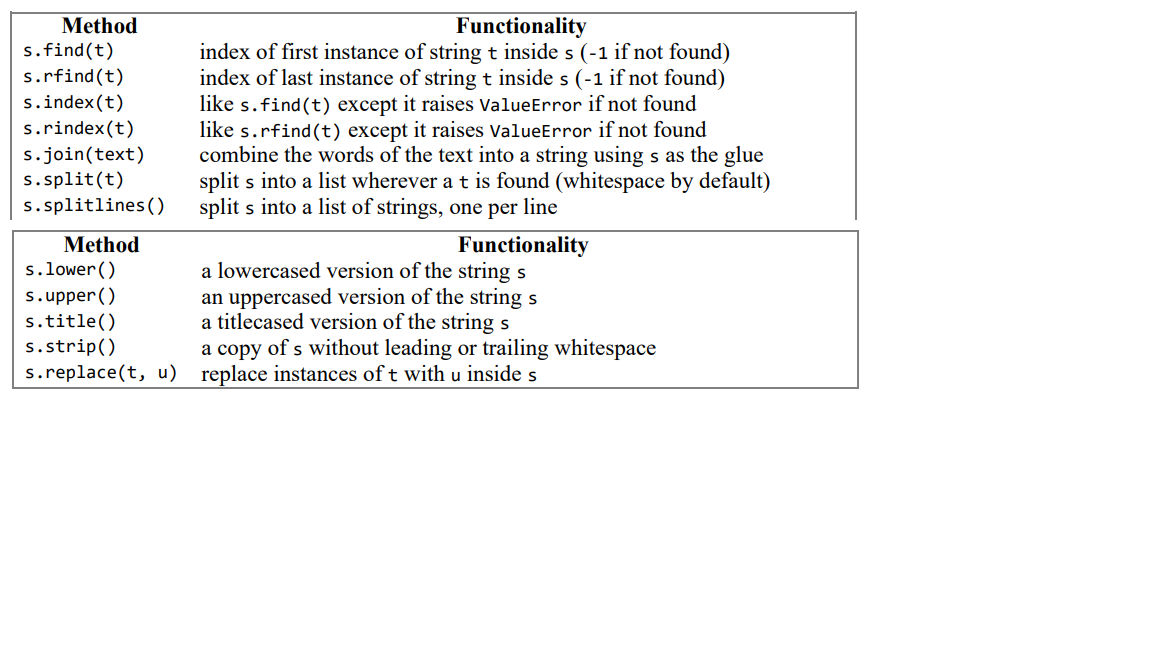

# The Difference between Lists and Strings

Strings and lists are both kinds of sequence. We can pull them apart by indexing and slicing them, and we can join
them together by concatenating them. However, we cannot join strings and lists:

In [1]:
query = 'Who knows?'
beatles = ['John', 'Paul', 'George', 'Ringo']
query[2]

'o'

In [2]:
beatles[2]


'George'

In [3]:
 query[:2]

'Wh'

In [4]:
beatles[:2]

['John', 'Paul']

Lists and strings do not have exactly the same functionality. **Lists have the added power that you can change their
elements:**


In [5]:
beatles[0] = "John Lennon"
del beatles[-1]
beatles

['John Lennon', 'Paul', 'George']

On the other hand if we try to do that with a string — changing the 0th character in query to 'F' — we get:

In [6]:
query[0] = 'F'

TypeError: 'str' object does not support item assignment

**This is because strings are immutable — you can't change a string once you have created it. However, lists are
mutable, and their contents can be modified at any time.** As a result, lists support operations that modify the
original value rather than producing a new value.


# 3.3 Text Processing with Unicode

In this
section, we will give an overview of how to use Unicode for processing texts that use non-ASCII character sets.


What is Unicode?
Unicode supports over a million characters. Each character is assigned a number, called a code point. In Python,
code points are written in the form \uXXXX, where XXXX is the number in 4-digit hexadecimal form.


Within a program, we can manipulate Unicode strings just like normal strings. However, when Unicode characters
are stored in files or displayed on a terminal, they must be encoded as a stream of bytes. Some encodings (such as
ASCII and Latin-2) use a single byte per code point, so they can only support a small subset of Unicode, enough
for a single language. Other encodings (such as UTF-8) use multiple bytes and can represent the full range of Unicode characters.
Text in files will be in a particular encoding, so we need some mechanism for translating it into Unicode —
translation into Unicode is called decoding. Conversely, to write out Unicode to a file or a terminal, we first need
to translate it into a suitable encoding — this translation out of Unicode is called encoding, and is illustrated as follows:


**Unicode Decoding and Encoding**


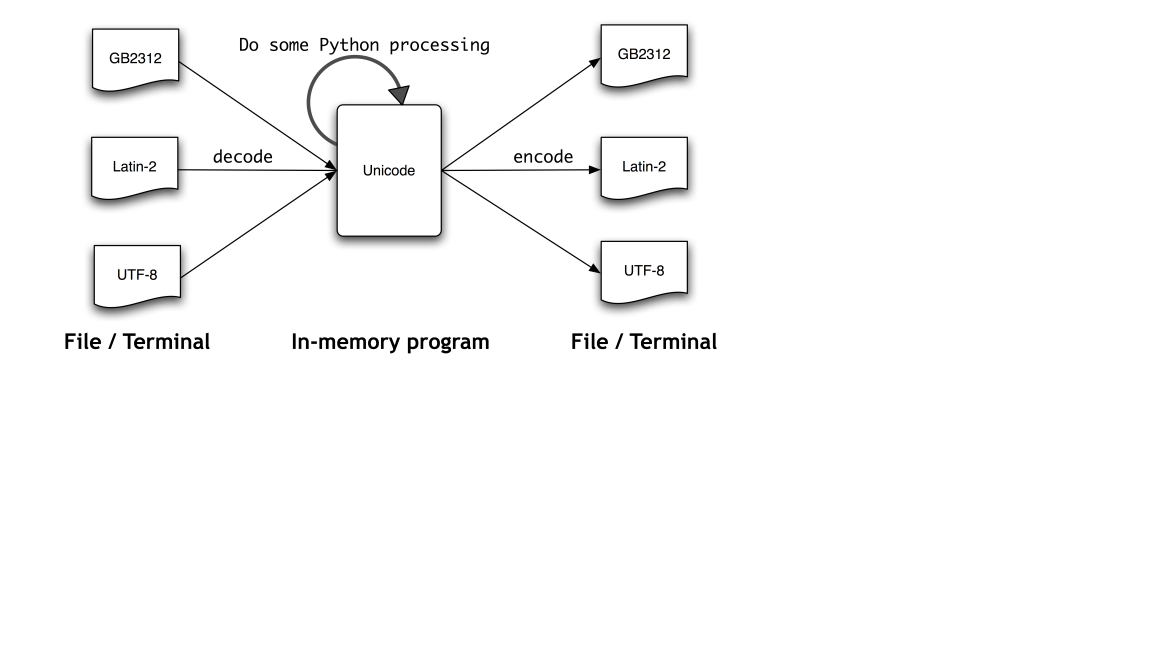
From a Unicode perspective, characters are abstract entities which can be realized as one or more glyphs. Only
glyphs can appear on a screen or be printed on paper. A font is a mapping from characters to glyphs.



# Extracting encoded text from files

In [2]:
import nltk
path = nltk.data.find('corpora/unicode_samples/polish-lat2.txt')

The Python open() function can read encoded data into Unicode strings, and write out Unicode strings in encoded
form. It takes a parameter to specify the encoding of the file being read or written. So let's open our Polish file
with the encoding 'latin2' and inspect the contents of the file:


In [3]:
f = open(path, encoding='latin2')
for line in f:
    line = line.strip()
    print(line)


Pruska Biblioteka Państwowa. Jej dawne zbiory znane pod nazwą
"Berlinka" to skarb kultury i sztuki niemieckiej. Przewiezione przez
Niemców pod koniec II wojny światowej na Dolny Śląsk, zostały
odnalezione po 1945 r. na terytorium Polski. Trafiły do Biblioteki
Jagiellońskiej w Krakowie, obejmują ponad 500 tys. zabytkowych
archiwaliów, m.in. manuskrypty Goethego, Mozarta, Beethovena, Bacha.


If this does not display correctly on your terminal, or if we want to see the underlying numerical values (or
"codepoints") of the characters, then we can convert all non-ASCII characters into their two-digit \xXX and fourdigit \uXXXX representations:

In [4]:
f = open(path, encoding='latin2')
for line in f:
    line = line.strip()
    print(line.encode('unicode_escape'))


b'Pruska Biblioteka Pa\\u0144stwowa. Jej dawne zbiory znane pod nazw\\u0105'
b'"Berlinka" to skarb kultury i sztuki niemieckiej. Przewiezione przez'
b'Niemc\\xf3w pod koniec II wojny \\u015bwiatowej na Dolny \\u015al\\u0105sk, zosta\\u0142y'
b'odnalezione po 1945 r. na terytorium Polski. Trafi\\u0142y do Biblioteki'
b'Jagiello\\u0144skiej w Krakowie, obejmuj\\u0105 ponad 500 tys. zabytkowych'
b'archiwali\\xf3w, m.in. manuskrypty Goethego, Mozarta, Beethovena, Bacha.'


The first line above illustrates a Unicode escape string preceded by the \u escape string, namely \u0144 . The
relevant Unicode character will be dislayed on the screen as the glyph ń. In the third line of the preceding
example, we see \xf3, which corresponds to the glyph ó, and is within the 128-255 range.
In Python 3, source code is encoded using UTF-8 by default, and you can include Unicode characters in strings if
you are using IDLE or another program editor that supports Unicode. Arbitrary Unicode characters can be
included using the \uXXXX escape sequence. We find the integer ordinal of a character using ord(). For example:

In [13]:
 ord('ń')


324

The hexadecimal 4 digit notation for 324 is 0144 (type hex(324) to discover this), and we can define a string with
the appropriate escape sequence.

In [14]:
nacute = '\u0144'
nacute

'ń'

We can also see how this character is represented as a sequence of bytes inside a text file:

In [15]:
 nacute.encode('utf8')


b'\xc5\x84'

The module unicodedata lets us inspect the properties of Unicode characters. In the following example, we select
all characters in the third line of our Polish text outside the ASCII range and print their UTF-8 byte sequence,
followed by their code point integer using the standard Unicode convention (i.e., prefixing the hex digits with U+),
followed by their Unicode name.


In [5]:
import unicodedata
import nltk

path = nltk.data.find('corpora/unicode_samples/polish-lat2.txt')
lines = open(path, encoding='latin2').readlines()
line = lines[2]

# Print the original line
print("Original Line:", line)

# Encode the line using 'unicode_escape' encoding
encoded_line = line.encode('unicode_escape')

# Print the encoded line
print("Encoded Line:", encoded_line)


Original Line: Niemców pod koniec II wojny światowej na Dolny Śląsk, zostały

Encoded Line: b'Niemc\\xf3w pod koniec II wojny \\u015bwiatowej na Dolny \\u015al\\u0105sk, zosta\\u0142y\\n'


In [6]:
import unicodedata
import nltk

path = nltk.data.find('corpora/unicode_samples/polish-lat2.txt')
lines = open(path, encoding='latin2').readlines()
line = lines[2]

for c in line:
    if ord(c) > 127:
        print('{} U+{:04x} {}'.format(c.encode('utf8'), ord(c), unicodedata.name(c)))


b'\xc3\xb3' U+00f3 LATIN SMALL LETTER O WITH ACUTE
b'\xc5\x9b' U+015b LATIN SMALL LETTER S WITH ACUTE
b'\xc5\x9a' U+015a LATIN CAPITAL LETTER S WITH ACUTE
b'\xc4\x85' U+0105 LATIN SMALL LETTER A WITH OGONEK
b'\xc5\x82' U+0142 LATIN SMALL LETTER L WITH STROKE


This code checks if the Unicode code point of each character is greater than 127. If it is, it prints the UTF-8 encoding, Unicode code point, and the Unicode name of the character. This can be useful for identifying and understanding non-ASCII characters in your text.

# 3.4 Regular Expressions for Detecting Word Patterns

Many linguistic processing tasks involve pattern matching. For example, we can find words ending with ed using
endswith('ed'). Regular expressions give us a more powerful and
flexible method for describing the character patterns we are interested in.

To use regular expressions in Python we need to import the re library using: import re. We also need a list of
words to search; we'll use the Words Corpus again (4). We will preprocess it to remove any proper names.


In [7]:
import nltk

wordlist = [w for w in nltk.corpus.words.words('en') if w.islower()]


# Using Basic Meta-Characters

Let's find words ending with ed using the regular expression «ed$». We will use the re.search(p, s) function to
check whether the pattern p can be found somewhere inside the string s. We need to specify the characters of
interest, and use the dollar sign which has a special behavior in the context of regular expressions in that it
matches the end of the word:


In [9]:
import nltk
import re

wordlist = [w for w in nltk.corpus.words.words('en') if w.islower()]

# Filter words ending with 'ed'
filtered_words = [w for w in wordlist if re.search('ed$', w)]

# Print the filtered words
print(filtered_words)



['abaissed', 'abandoned', 'abased', 'abashed', 'abatised', 'abed', 'aborted', 'abridged', 'abscessed', 'absconded', 'absorbed', 'abstracted', 'abstricted', 'accelerated', 'accepted', 'accidented', 'accoladed', 'accolated', 'accomplished', 'accosted', 'accredited', 'accursed', 'accused', 'accustomed', 'acetated', 'acheweed', 'aciculated', 'aciliated', 'acknowledged', 'acorned', 'acquainted', 'acquired', 'acquisited', 'acred', 'aculeated', 'addebted', 'added', 'addicted', 'addlebrained', 'addleheaded', 'addlepated', 'addorsed', 'adempted', 'adfected', 'adjoined', 'admired', 'admitted', 'adnexed', 'adopted', 'adossed', 'adreamed', 'adscripted', 'aduncated', 'advanced', 'advised', 'aeried', 'aethered', 'afeared', 'affected', 'affectioned', 'affined', 'afflicted', 'affricated', 'affrighted', 'affronted', 'aforenamed', 'afterfeed', 'aftershafted', 'afterthoughted', 'afterwitted', 'agazed', 'aged', 'agglomerated', 'aggrieved', 'agminated', 'agnamed', 'agonied', 'agreed', 'agueweed', 'ahungere

The . wildcard symbol matches any single character. Suppose we have room in a crossword puzzle for an 8-letter
word with j as its third letter and t as its sixth letter. In place of each blank cell we use a period:


In [10]:
import nltk
import re

wordlist = [w for w in nltk.corpus.words.words('en') if w.islower()]

# Filter words matching the specified pattern
filtered_words = [w for w in wordlist if re.search('^..j..t..$', w)]

# Print the filtered words
print(filtered_words)



['abjectly', 'adjuster', 'dejected', 'dejectly', 'injector', 'majestic', 'objectee', 'objector', 'rejecter', 'rejector', 'unjilted', 'unjolted', 'unjustly']


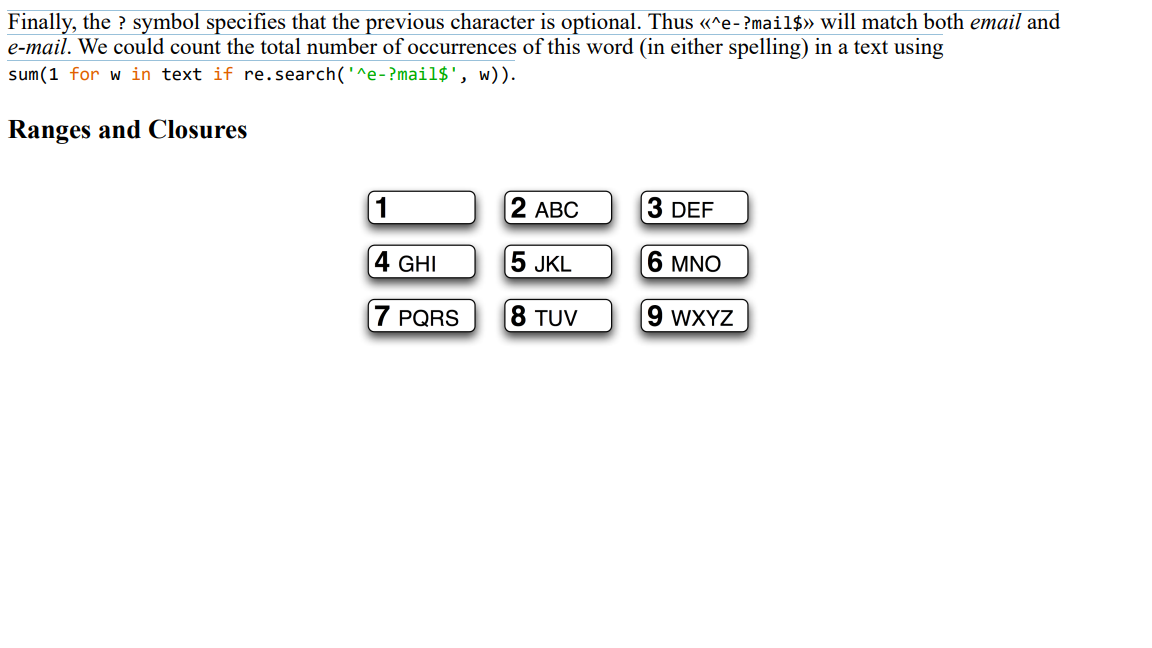

The T9 system is used for entering text on mobile phones. **Two or more words that are entered with the
same sequence of keystrokes are known as textonyms.** For example, both hole and golf are entered by pressing
the sequence 4653. What other words could be produced with the same sequence? Here we use the regular
expression «^[ghi][mno][jlk][def]$»:

In [22]:
[w for w in wordlist if re.search('^[ghi][mno][jlk][def]$', w)]

['gold', 'golf', 'hold', 'hole']

The first part of the expression, «^[ghi]», matches the start of a word followed by g, h, or i. The next part of the
expression, «[mno]», constrains the second character to be m, n, or o. The third and fourth characters are also
constrained. Only four words satisfy all these constraints. Note that the order of characters inside the square
brackets is not significant, so we could have written «^[hig][nom][ljk][fed]$» and matched the same words.


Let's explore the + symbol a bit further. Notice that it can be applied to individual letters, or to bracketed sets of
letters:


In [24]:
chat_words = sorted(set(w for w in nltk.corpus.nps_chat.words()))
[w for w in chat_words if re.search('^m+i+n+e+$', w)]


['miiiiiiiiiiiiinnnnnnnnnnneeeeeeeeee',
 'miiiiiinnnnnnnnnneeeeeeee',
 'mine',
 'mmmmmmmmiiiiiiiiinnnnnnnnneeeeeeee']

In [25]:
[w for w in chat_words if re.search('^[ha]+$', w)]


['a',
 'aaaaaaaaaaaaaaaaa',
 'aaahhhh',
 'ah',
 'ahah',
 'ahahah',
 'ahh',
 'ahhahahaha',
 'ahhh',
 'ahhhh',
 'ahhhhhh',
 'ahhhhhhhhhhhhhh',
 'h',
 'ha',
 'haaa',
 'hah',
 'haha',
 'hahaaa',
 'hahah',
 'hahaha',
 'hahahaa',
 'hahahah',
 'hahahaha',
 'hahahahaaa',
 'hahahahahaha',
 'hahahahahahaha',
 'hahahahahahahahahahahahahahahaha',
 'hahahhahah',
 'hahhahahaha']

# 3.5 Useful Applications of Regular Expressions


Apart from checking if a regular expression matches a word, we can use regular
expressions to extract material from words, or to modify words in specific ways.

# Extracting Word Pieces

The re.findall() ("find all") method finds all (non-overlapping) matches of the given regular expression. Let's
find all the vowels in a word, then count them:


In [11]:
import re

word = 'supercalifragilisticexpialidocious'
vowels = re.findall(r'[aeiou]', word)

# Print the list of vowels found in the word
print(vowels)



['u', 'e', 'a', 'i', 'a', 'i', 'i', 'i', 'e', 'i', 'a', 'i', 'o', 'i', 'o', 'u']


In [12]:
len(re.findall(r'[aeiou]', word))


16

To analyze the frequency of sequences of vowels (vowels being represented by the characters 'aeiou') in words from the Treebank corpus provided by nltk.

Let's look for all sequences of two or more vowels in some text, and determine their relative frequency:


In [7]:
wsj = sorted(set(nltk.corpus.treebank.words()))
fd = nltk.FreqDist(vs for word in wsj
for vs in re.findall(r'[aeiou]{2,}', word))
fd.most_common(12)

[('io', 549),
 ('ea', 476),
 ('ie', 331),
 ('ou', 329),
 ('ai', 261),
 ('ia', 253),
 ('ee', 217),
 ('oo', 174),
 ('ua', 109),
 ('au', 106),
 ('ue', 105),
 ('ui', 95)]

**Explanation:**

Let's break down the code step by step:

1)wsj = sorted(set(nltk.corpus.treebank.words())): This line retrieves all words from the Treebank corpus, removes duplicate words using a set, and then sorts them alphabetically. The result is a list of unique words from the Treebank corpus.

2)fd = nltk.FreqDist(vs for word in wsj for vs in re.findall(r'[aeiou]{2,}', word)): This line creates a frequency distribution (FreqDist) of sequences of vowels (at least two consecutive vowels) in the words obtained from the Treebank corpus. It uses a generator expression to iterate over each word in the wsj list and each sequence of vowels (vs) found using the re.findall function with the regular expression [aeiou]{2,}. The {2,} indicates that it should find sequences of at least two vowels.

3)fd.most_common(12): This line retrieves the 12 most common elements (sequences of vowels) along with their frequencies from the frequency distribution created in the previous step. It returns a list of tuples, where each tuple contains a sequence of vowels and its frequency, sorted in descending order of frequency.

# Finding Word Stems
When we use a web search engine, we usually don't mind (or even notice) if the words in the document differ
from our search terms in having different endings. A query for laptops finds documents containing laptop and vice
versa. Indeed, laptop and laptops are just two forms of the same dictionary word (or lemma). For some language
processing tasks we want to ignore word endings, and just deal with word stems.
There are various ways we can pull out the stem of a word. Here's a simple-minded approach which just strips off
anything that looks like a suffix:


For example, if you call stem("running"), the function will recognize the "ing" suffix and return "run". If you call stem("happily"), it will recognize the "ly" suffix and return "happi". If the word does not end with any of the specified suffixes, the original word is returned.







In [13]:
def stem(word):
    for suffix in ['ing', 'ly', 'ed', 'ious', 'ies', 'ive', 'es', 's', 'ment']:
        if word.endswith(suffix):
            return word[:-len(suffix)]
    return word


Although we will ultimately use NLTK's built-in stemmers, it's interesting to see how we can use regular
expressions for this task. Our first step is to build up a disjunction of all the suffixes. We need to enclose it in
parentheses in order to limit the scope of the disjunction.


In [10]:
 re.findall(r'^.*(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')

['ing']

**Explanation**:
    
    r'^.*(ing|ly|ed|ious|ies|ive|es|s|ment)$': This is a regular expression pattern enclosed in raw string notation (r). Breaking it down:
^: Asserts the start of the string.
.*: Matches any character (except for a newline) zero or more times. This part essentially matches any sequence of characters.
(ing|ly|ed|ious|ies|ive|es|s|ment): This is a group that matches any of the specified suffixes: 'ing', 'ly', 'ed', 'ious', 'ies', 'ive', 'es', 's', or 'ment'.
$: Asserts the end of the string.
The overall pattern is trying to find and capture any of the specified suffixes at the end of the input string.

Here, re.findall() just gave us the suffix even though the regular expression matched the entire word. This is
because the parentheses have a second function, to select substrings to be extracted. If we want to use the
parentheses to specify the scope of the disjunction, but not to select the material to be output, we have to add ?:,
which is just one of many arcane subtleties of regular expressions. Here's the revised version.


In [11]:
 re.findall(r'^.*(?:ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')

['processing']

**Explanation**

r'^.*(?:ing|ly|ed|ious|ies|ive|es|s|ment)$': 

This is a regular expression pattern in raw string notation (r).
1)^: Asserts the start of the string.

2)*: Matches any character (except for a newline) zero or more times. This part essentially matches any sequence of characters.

3)(?:ing|ly|ed|ious|ies|ive|es|s|ment): This is a non-capturing group that matches any of the specified suffixes: 'ing', 'ly', 'ed', 'ious', 'ies', 'ive', 'es', 's', or 'ment'.

4)$: Asserts the end of the string.

The overall pattern is trying to find and capture any sequence of characters that ends with one of the specified suffixes at the end of the input string.

However, we'd actually like to split the word into stem and suffix. So we should just parenthesize both parts of the
regular expression:

In [12]:
re.findall(r'^(.*)(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')

[('process', 'ing')]

Explaination:
    
    r'^(.*)(ing|ly|ed|ious|ies|ive|es|s|ment)$': This is a regular expression pattern in raw string notation (r).
1)^: Asserts the start of the string.
2).*: Matches any character (except for a newline) zero or more times. This part captures any sequence of characters (greedily).
3)(ing|ly|ed|ious|ies|ive|es|s|ment): This is a capturing group that matches any of the specified suffixes: 'ing', 'ly', 'ed', 'ious', 'ies', 'ive', 'es', 's', or 'ment'.
4)$: Asserts the end of the string.

This looks promising, but still has a problem. Let's look at a different word, processes:

In [14]:
re.findall(r'^(.*)(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processes')

[('processe', 's')]

The regular expression incorrectly found an -s suffix instead of an -es suffix. This demonstrates another subtlety:
the star operator is "greedy" and the .* part of the expression tries to consume as much of the input as possible. If
we use the "non-greedy" version of the star operator, written *?, we get what we want:

In [15]:
 re.findall(r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processes')


[('process', 'es')]

r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)$': 

This is a regular expression pattern in raw string notation (r).
1)^: Asserts the start of the string.
2).*?: Matches any character (except for a newline) zero or more times, but the ? makes it non-greedy. This means it captures as little as possible while still allowing the rest of the pattern to match.
3)(ing|ly|ed|ious|ies|ive|es|s|ment): This is a capturing group that matches any of the specified suffixes: 'ing', 'ly', 'ed', 'ious', 'ies', 'ive', 'es', 's', or 'ment'.
4)$: Asserts the end of the string.

This works even when we allow an empty suffix, by making the content of the second parentheses optional:


In [16]:
re.findall(r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$', 'language')

[('language', '')]

This approach still has many problems (can you spot them?) but we will move on to define a function to perform
stemming, and apply it to a whole text:

In [15]:
import re
from nltk import word_tokenize

def stem(word):
    regexp = r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$'
    stem, suffix = re.findall(regexp, word)[0]
    return stem

raw = """DENNIS: Listen, strange women lying in ponds distributing swords
... is no basis for a system of government. Supreme executive power derives from
... a mandate from the masses, not from some farcical aquatic ceremony."""
tokens = word_tokenize(raw)
result = [stem(t) for t in tokens]

# Print the result
print(result)



['DENNIS', ':', 'Listen', ',', 'strange', 'women', 'ly', 'in', 'pond', 'distribut', 'sword', '...', 'i', 'no', 'basi', 'for', 'a', 'system', 'of', 'govern', '.', 'Supreme', 'execut', 'power', 'deriv', 'from', '...', 'a', 'mandate', 'from', 'the', 'mass', ',', 'not', 'from', 'some', 'farcical', 'aquatic', 'ceremony', '.']


Explanation:

def stem(word):: This line defines the stem function, which takes a single argument (word).

regexp = r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$': 

This line defines a regular expression pattern stored in the variable regexp. The pattern is designed to match a word and its suffix. The non-greedy .*? captures the stem of the word, and the (ing|ly|ed|ious|ies|ive|es|s|ment)? part captures one of the specified suffixes, making it optional due to the ?.

stem, suffix = re.findall(regexp, word)[0]: This line applies the regular expression to the input word using re.findall. It extracts the stem and the suffix (if present) from the first match in the result. The [0] at the end is used to retrieve the first match.

return stem: The function returns only the stem of the word after applying the stemming operation.

raw = """...""": This block defines a multiline string (raw) containing a passage of text. This text appears to be a quote from Monty Python and the Holy Grail.

tokens = word_tokenize(raw): This line tokenizes the multiline string into a list of words using the word_tokenize function from the Natural Language Toolkit (NLTK).

[stem(t) for t in tokens]: This is a list comprehension that applies the stem function to each token (word) in the tokens list, effectively performing stemming on the entire list of words.

# Searching Tokenized Text

You can use a special kind of regular expression for searching across multiple words in a text (where a text is a list
of tokens). For example, "<a> <man>" finds all instances of a man in the text. The angle brackets are used to mark
token boundaries, and any whitespace between the angle brackets is ignored (behaviors that are unique to NLTK's
findall() method for texts). In the following example, we include <.*> which will match any single token, and
enclose it in parentheses so only the matched word (e.g. monied) and not the matched phrase (e.g. a monied man)
is produced. 

In [19]:
from nltk.corpus import gutenberg, nps_chat
moby = nltk.Text(gutenberg.words('melville-moby_dick.txt'))#This line creates a Text object named moby from the words in the Moby Dick text of the Gutenberg corpus. 
#The nltk.Text class provides some useful methods for analyzing and visualizing text data.
moby.findall(r"<a> (<.*>) <man>") #This line uses the findall method of the Text class to find 
#instances of a specified pattern in the text. The pattern is defined using a regular expression.

#<a>: This matches the literal string "a".
#(<.*>): This is a capturing group that matches any sequence of characters (.*), 
#enclosed in parentheses for capturing. The .* matches any text between "<" and ">" and captures it.
#<man>: This matches the literal string "man".

monied; nervous; dangerous; white; white; white; pious; queer; good;
mature; white; Cape; great; wise; wise; butterless; white; fiendish;
pale; furious; better; certain; complete; dismasted; younger; brave;
brave; brave; brave


The second example finds three-word phrases ending with the word bro 

In [20]:
chat = nltk.Text(nps_chat.words())
chat.findall(r"<.*> <.*> <bro>") 

you rule bro; telling you bro; u twizted bro


The last example finds
sequences of three or more words starting with the letter l 

In [16]:
import nltk

# Assuming you have a list of words from a chat context
chat_words = ["lol", "rofl", "lmao", "lol", "rofl", "lol", "lmao", "rofl", "rofl"]

# Use a regular expression to find sequences of words starting with 'l' and having at least 3 repetitions
result = [seq for seq in chat_words if re.search(r"^l.*", seq) and len(seq) >= 3]

# Print the result
print(result)



['lol', 'lmao', 'lol', 'lol', 'lmao']


It is easy to build search patterns when the linguistic phenomenon we're studying is tied to particular words. In
some cases, a little creativity will go a long way. For instance, searching a large text corpus for expressions of the
form x and other ys allows us to discover hypernyms 

In [18]:
from nltk.corpus import brown
import nltk

# Concatenate words from 'hobbies' and 'learned' categories
hobbies_learned = nltk.Text(brown.words(categories=['hobbies', 'learned']))

# Use findall with a proper regular expression pattern
result = hobbies_learned.findall(r"<\w*> <and> <other> <\w*s>")

# Print the result
print(result)



speed and other activities; water and other liquids; tomb and other
landmarks; Statues and other monuments; pearls and other jewels;
charts and other items; roads and other features; figures and other
objects; military and other areas; demands and other factors;
abstracts and other compilations; iron and other metals
None


# 3.6 Normalizing Text

In earlier program examples we have often converted text to lowercase before doing anything with its words, e.g.
set(w.lower() for w in text). By using lower(), we have normalized the text to lowercase so that the
distinction between The and the is ignored. Often we want to go further than this, and strip off any affixes, a task
known as stemming. A further step is to make sure that the resulting form is a known word in a dictionary, a task
known as lemmatization. We discuss each of these in turn. First, we need to define the data we will use in this
section:

Stemming and lemmatization are both techniques used in natural language processing to reduce words to their base or root forms, but they operate in slightly different ways.

### Stemming:
- **Goal:** The primary goal of stemming is to reduce words to their base or root form by removing suffixes.
- **Process:** Stemming algorithms remove common suffixes from words. The resulting stems may not always be valid words.
- **Example:** For example, the word "running" would be reduced to "run" using stemming.

### Lemmatization:
- **Goal:** The goal of lemmatization is to reduce words to their base or root form, known as the lemma, while ensuring that the resulting lemma is a valid word.
- **Process:** Lemmatization involves looking at the meaning of the word and its context, and it uses a lexicon or a knowledge base to perform the transformation.
- **Example:** For example, the word "better" would be reduced to "good" because "good" is the base form of "better."

### Differences:

1. **Output Validity:**
   - Stemming may produce stems that are not valid words.
   - Lemmatization produces valid words as it considers the context and meaning of the words.

2. **Complexity:**
   - Stemming is generally less complex and faster as it involves the removal of suffixes based on rules.
   - Lemmatization can be more complex and computationally intensive as it requires knowledge about the language and the context of words.

3. **Use Cases:**
   - Stemming is often used in information retrieval, search engines, and text mining where speed is crucial, and a somewhat approximate reduction is acceptable.
   - Lemmatization is more suitable for applications requiring precision, such as language translation, question answering, and sentiment analysis.

4. **Tools and Libraries:**
   - Common stemming algorithms include Porter Stemmer, Snowball Stemmer.
   - Lemmatization often involves the use of WordNet or other language-specific lemmatization tools.

In summary, while both stemming and lemmatization aim to reduce words to their base forms, stemming is faster and produces approximate results, while lemmatization is more precise and considers the meaning and context of words. The choice between stemming and lemmatization depends on the specific requirements of the natural language processing task.


In [7]:
import nltk
from nltk import word_tokenize
raw = """DENNIS: Listen, strange women lying in ponds distributing swords
... is no basis for a system of government. Supreme executive power derives from
... a mandate from the masses, not from some farcical aquatic ceremony."""
tokens = word_tokenize(raw)
print(tokens)

['DENNIS', ':', 'Listen', ',', 'strange', 'women', 'lying', 'in', 'ponds', 'distributing', 'swords', '...', 'is', 'no', 'basis', 'for', 'a', 'system', 'of', 'government', '.', 'Supreme', 'executive', 'power', 'derives', 'from', '...', 'a', 'mandate', 'from', 'the', 'masses', ',', 'not', 'from', 'some', 'farcical', 'aquatic', 'ceremony', '.']


# Stemmers
NLTK includes several off-the-shelf stemmers, and if you ever need a stemmer you should use one of these in
preference to crafting your own using regular expressions, since these handle a wide range of irregular cases. The
Porter and Lancaster stemmers follow their own rules for stripping affixes. Observe that the Porter stemmer
correctly handles the word lying (mapping it to lie), while the Lancaster stemmer does not.


In [4]:
import nltk
from nltk import word_tokenize

raw = """DENNIS: Listen, strange women lying in ponds distributing swords
... is no basis for a system of government. Supreme executive power derives from
... a mandate from the masses, not from some farcical aquatic ceremony."""

tokens = word_tokenize(raw)

porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()

porter_stems = [porter.stem(t) for t in tokens]
lancaster_stems = [lancaster.stem(t) for t in tokens]

#print(tokens)
print("Porter stems:", porter_stems)
print("Lancaster stems:", lancaster_stems)


Porter stems: ['denni', ':', 'listen', ',', 'strang', 'women', 'lie', 'in', 'pond', 'distribut', 'sword', '...', 'is', 'no', 'basi', 'for', 'a', 'system', 'of', 'govern', '.', 'suprem', 'execut', 'power', 'deriv', 'from', '...', 'a', 'mandat', 'from', 'the', 'mass', ',', 'not', 'from', 'some', 'farcic', 'aquat', 'ceremoni', '.']
Lancaster stems: ['den', ':', 'list', ',', 'strange', 'wom', 'lying', 'in', 'pond', 'distribut', 'sword', '...', 'is', 'no', 'bas', 'for', 'a', 'system', 'of', 'govern', '.', 'suprem', 'execut', 'pow', 'der', 'from', '...', 'a', 'mand', 'from', 'the', 'mass', ',', 'not', 'from', 'som', 'farc', 'aqu', 'ceremony', '.']


In [25]:
#[lancaster.stem(t) for t in tokens]


['den',
 ':',
 'list',
 ',',
 'strange',
 'wom',
 'lying',
 'in',
 'pond',
 'distribut',
 'sword',
 'is',
 'no',
 'bas',
 'for',
 'a',
 'system',
 'of',
 'govern',
 '.',
 'suprem',
 'execut',
 'pow',
 'der',
 'from',
 'a',
 'mand',
 'from',
 'the',
 'mass',
 ',',
 'not',
 'from',
 'som',
 'farc',
 'aqu',
 'ceremony',
 '.']

Stemming is not a well-defined process, and we typically pick the stemmer that best suits the application we have
in mind. The Porter Stemmer is a good choice if you are indexing some texts and want to support search using
alternative forms of words. 

In [5]:
import nltk
class IndexedText(object):
    def __init__(self, stemmer, text):
        self._text = text
        self._stemmer = stemmer
        self._index = nltk.Index((self._stem(word), i)
                                 for (i, word) in enumerate(text))
    
    def concordance(self, word, width=40):
        key = self._stem(word)
        wc = int(width / 4)  # words of context
        
        for i in self._index[key]:
            lcontext = ' '.join(self._text[i - wc:i])
            rcontext = ' '.join(self._text[i:i + wc])
            ldisplay = '{:>{width}}'.format(lcontext[-width:], width=width)
            rdisplay = '{:{width}}'.format(rcontext[:width], width=width)
            print(ldisplay, rdisplay)
    
    def _stem(self, word):
        return self._stemmer.stem(word).lower()


In [6]:
from nltk.stem import PorterStemmer
# Example text
text = "This is an example sentence. Another example sentence follows."
# Create an IndexedText object
stemmer = PorterStemmer()
indexed_text = IndexedText(stemmer, nltk.word_tokenize(text))
# Print concordance for the word "example"
indexed_text.concordance("example", width=30)



                               example sentence . Another exa
 an example sentence . Another example sentence follows .    


# Lemmatization
The WordNet lemmatizer only removes affixes if the resulting word is in its dictionary. This additional checking
process makes the lemmatizer slower than the above stemmers. Notice that it doesn't handle lying, but it converts
women to woman.

In [28]:
wnl = nltk.WordNetLemmatizer()
[wnl.lemmatize(t) for t in tokens]


['DENNIS',
 ':',
 'Listen',
 ',',
 'strange',
 'woman',
 'lying',
 'in',
 'pond',
 'distributing',
 'sword',
 'is',
 'no',
 'basis',
 'for',
 'a',
 'system',
 'of',
 'government',
 '.',
 'Supreme',
 'executive',
 'power',
 'derives',
 'from',
 'a',
 'mandate',
 'from',
 'the',
 'mass',
 ',',
 'not',
 'from',
 'some',
 'farcical',
 'aquatic',
 'ceremony',
 '.']

The WordNet lemmatizer is a good choice if you want to compile the vocabulary of some texts and want a list of
valid lemmas (or lexicon headwords).


# 3.7 Regular Expressions for Tokenizing Text

Tokenization is the task of cutting a string into identifiable linguistic units that constitute a piece of language data.
Although it is a fundamental task, we have been able to delay it until now because many corpora are already
tokenized, and because NLTK includes some tokenizers. Now that you are familiar with regular expressions, you
can learn how to use them to tokenize text, and to have much more control over the process.


# Simple Approaches to Tokenization
The very simplest method for tokenizing text is to split on whitespace. Consider the following text from Alice's
Adventures in Wonderland:

In [29]:
 raw = """'When I'M a Duchess,' she said to herself, (not in a very hopeful tone
... though), 'I won't have any pepper in my kitchen AT ALL. Soup does very
... well without--Maybe it's always pepper that makes people hot-tempered,'..."""


We could split this raw text on whitespace using raw.split(). To do the same using a regular expression, it is not
enough to match any space characters in the string since this results in tokens that contain a \n newline
character; instead we need to match any number of spaces, tabs, or newlines :

In [30]:
 re.split(r' ', raw) 

["'When",
 "I'M",
 'a',
 "Duchess,'",
 'she',
 'said',
 'to',
 'herself,',
 '(not',
 'in',
 'a',
 'very',
 'hopeful',
 'tone\nthough),',
 "'I",
 "won't",
 'have',
 'any',
 'pepper',
 'in',
 'my',
 'kitchen',
 'AT',
 'ALL.',
 'Soup',
 'does',
 'very\nwell',
 'without--Maybe',
 "it's",
 'always',
 'pepper',
 'that',
 'makes',
 'people',
 "hot-tempered,'..."]

In [31]:
 re.split(r'[ \t\n]+', raw) 

["'When",
 "I'M",
 'a',
 "Duchess,'",
 'she',
 'said',
 'to',
 'herself,',
 '(not',
 'in',
 'a',
 'very',
 'hopeful',
 'tone',
 'though),',
 "'I",
 "won't",
 'have',
 'any',
 'pepper',
 'in',
 'my',
 'kitchen',
 'AT',
 'ALL.',
 'Soup',
 'does',
 'very',
 'well',
 'without--Maybe',
 "it's",
 'always',
 'pepper',
 'that',
 'makes',
 'people',
 "hot-tempered,'..."]

The regular expression «[ \t\n]+» matches one or more space, tab (\t) or newline (\n). Other whitespace
characters, such as carriage-return and form-feed should really be included too. Instead, we will use a built-in re
abbreviation, \s, which means any whitespace character. The above statement can be rewritten as
re.split(r'\s+', raw).


Splitting on whitespace gives us tokens like '(not' and 'herself,'. An alternative is to use the fact that Python
provides us with a character class \w for word characters, equivalent to [a-zA-Z0-9_]. It also defines the
complement of this class \W, i.e. all characters other than letters, digits or underscore. We can use \W in a simple
regular expression to split the input on anything other than a word character:

In [33]:
 re.split(r'\W+', raw)

['',
 'When',
 'I',
 'M',
 'a',
 'Duchess',
 'she',
 'said',
 'to',
 'herself',
 'not',
 'in',
 'a',
 'very',
 'hopeful',
 'tone',
 'though',
 'I',
 'won',
 't',
 'have',
 'any',
 'pepper',
 'in',
 'my',
 'kitchen',
 'AT',
 'ALL',
 'Soup',
 'does',
 'very',
 'well',
 'without',
 'Maybe',
 'it',
 's',
 'always',
 'pepper',
 'that',
 'makes',
 'people',
 'hot',
 'tempered',
 '']

Observe that this gives us empty strings at the start and the end (to understand why, try doing 'xx'.split('x')).
We get the same tokens, but without the empty strings, with re.findall(r'\w+', raw), using a pattern that
matches the words instead of the spaces. Now that we're matching the words, we're in a position to extend the
regular expression to cover a wider range of cases. The regular expression «\w+|\S\w*» will first try to match any
sequence of word characters. If no match is found, it will try to match any non-whitespace character (\S is the
complement of \s) followed by further word characters. This means that punctuation is grouped with any
following letters (e.g. 's) but that sequences of two or more punctuation characters are separated.


In [34]:
re.findall(r'\w+|\S\w*', raw)


["'When",
 'I',
 "'M",
 'a',
 'Duchess',
 ',',
 "'",
 'she',
 'said',
 'to',
 'herself',
 ',',
 '(not',
 'in',
 'a',
 'very',
 'hopeful',
 'tone',
 'though',
 ')',
 ',',
 "'I",
 'won',
 "'t",
 'have',
 'any',
 'pepper',
 'in',
 'my',
 'kitchen',
 'AT',
 'ALL',
 '.',
 'Soup',
 'does',
 'very',
 'well',
 'without',
 '-',
 '-Maybe',
 'it',
 "'s",
 'always',
 'pepper',
 'that',
 'makes',
 'people',
 'hot',
 '-tempered',
 ',',
 "'",
 '.',
 '.',
 '.']

Let's generalize the \w+ in the above expression to permit word-internal hyphens and apostrophes:
«\w+([-']\w+)*». This expression means \w+ followed by zero or more instances of [-']\w+; it would match hottempered and it's. (We need to include ?: in this expression for reasons discussed earlier.) We'll also add a pattern
to match quote characters so these are kept separate from the text they enclose.

In [35]:
print(re.findall(r"\w+(?:[-']\w+)*|'|[-.(]+|\S\w*", raw))


["'", 'When', "I'M", 'a', 'Duchess', ',', "'", 'she', 'said', 'to', 'herself', ',', '(', 'not', 'in', 'a', 'very', 'hopeful', 'tone', 'though', ')', ',', "'", 'I', "won't", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL', '.', 'Soup', 'does', 'very', 'well', 'without', '--', 'Maybe', "it's", 'always', 'pepper', 'that', 'makes', 'people', 'hot-tempered', ',', "'", '...']


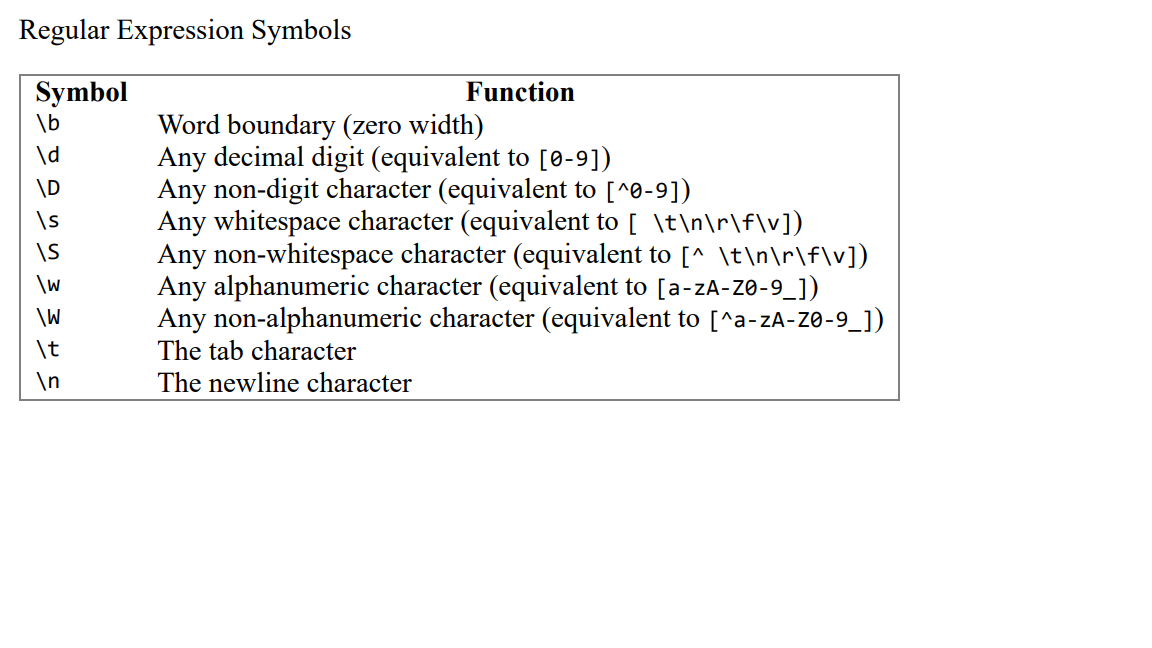

# 3.8 Segmentation
Tokenization is an instance of a more general problem of segmentation. In this section we will look at two other
instances of this problem, which use radically different techniques to the ones we have seen so far in this chapter.

# Sentence Segmentation
Manipulating texts at the level of individual words often presupposes the ability to divide a text into individual
sentences. As we have seen, some corpora already provide access at the sentence level. In the following example,
we compute the average number of words per sentence in the Brown Corpus:

In [37]:
len(nltk.corpus.brown.words()) / len(nltk.corpus.brown.sents())

20.250994070456922

In other cases, the text is only available as a stream of characters. Before tokenizing the text into words, we need
to segment it into sentences. NLTK facilitates this by including the Punkt sentence segmenter Here is an example of its use in segmenting the text of a novel. (Note that if the segmenter's internal data
has been updated by the time you read this, you will see different output):

In [38]:
text = nltk.corpus.gutenberg.raw('chesterton-thursday.txt')
sents = nltk.sent_tokenize(text)
pprint.pprint(sents[79:89])


['"Nonsense!"',
 'said Gregory, who was very rational when anyone else\nattempted paradox.',
 '"Why do all the clerks and navvies in the\n'
 'railway trains look so sad and tired, so very sad and tired?',
 'I will\ntell you.',
 'It is because they know that the train is going right.',
 'It\n'
 'is because they know that whatever place they have taken a ticket\n'
 'for that place they will reach.',
 'It is because after they have\n'
 'passed Sloane Square they know that the next station must be\n'
 'Victoria, and nothing but Victoria.',
 'Oh, their wild rapture!',
 'oh,\n'
 'their eyes like stars and their souls again in Eden, if the next\n'
 'station were unaccountably Baker Street!"',
 '"It is you who are unpoetical," replied the poet Syme.']


# Word Segmentation

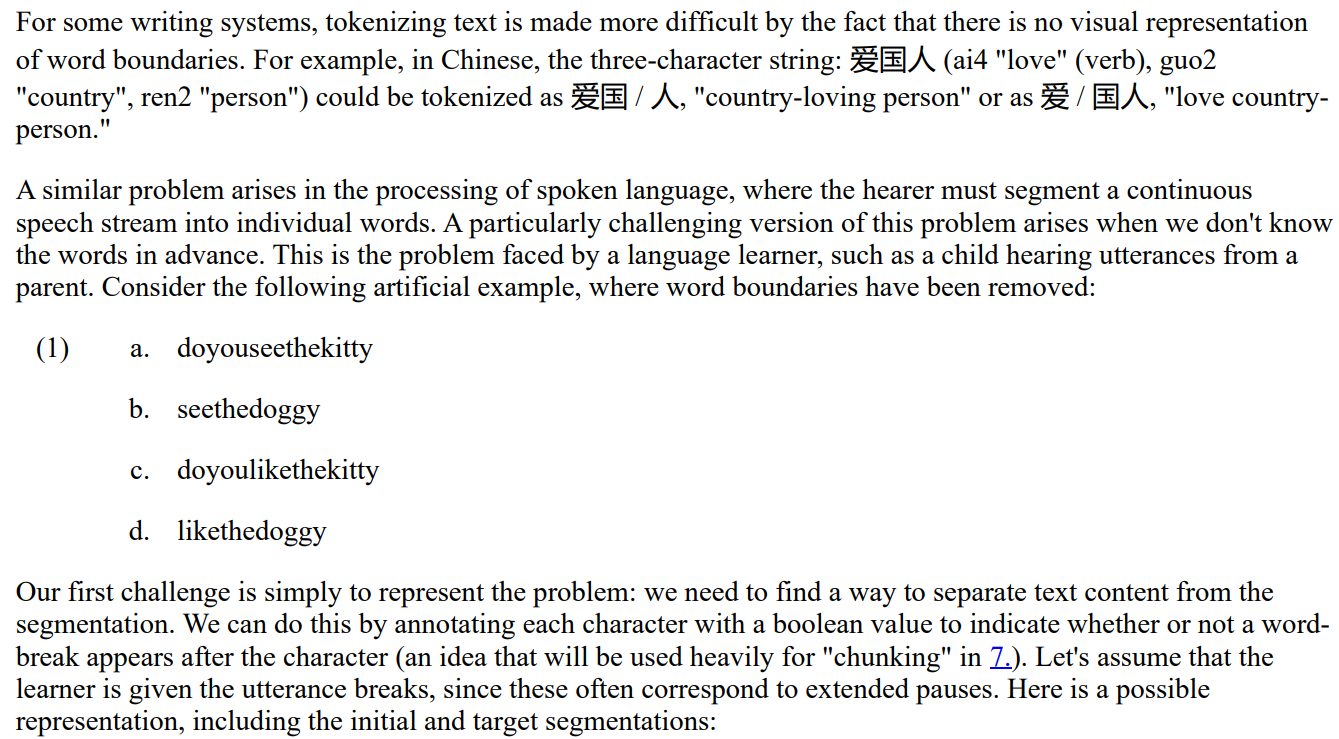

In [39]:
text = "doyouseethekittyseethedoggydoyoulikethekittylikethedoggy"
seg1 = "0000000000000001000000000010000000000000000100000000000"
seg2 = "0100100100100001001001000010100100010010000100010010000"


Observe that the segmentation strings consist of zeros and ones. They are one character shorter than the source
text, since a text of length n can only be broken up in n-1 places. The segment() function demonstrates that
we can get back to the original segmented text from the above representation.


In [40]:
def segment(text, segs):
    words = []
    last = 0
    for i in range(len(segs)):
        if segs[i] == '1':
            words.append(text[last:i+1])
            last = i+1
            words.append(text[last:])
            return words

In [41]:
text = "doyouseethekittyseethedoggydoyoulikethekittylikethedoggy"
seg1 = "0000000000000001000000000010000000000000000100000000000"
seg2 = "0100100100100001001001000010100100010010000100010010000"
segment(text, seg1)


['doyouseethekitty', 'seethedoggydoyoulikethekittylikethedoggy']

In [42]:
segment(text, seg2)


['do', 'youseethekittyseethedoggydoyoulikethekittylikethedoggy']

# 3.9 Formatting: From Lists to Strings

Often we write a program to report a single data item, such as a particular element in a corpus that meets some
complicated criterion, or a single summary statistic such as a word-count or the performance of a tagger. More
often, we write a program to produce a structured result; for example, a tabulation of numbers or linguistic forms,
or a reformatting of the original data. When the results to be presented are linguistic, textual output is usually the
most natural choice. However, when the results are numerical, it may be preferable to produce graphical output. In
this section you will learn about a variety of ways to present program output.


# From Lists to Strings
The simplest kind of structured object we use for text processing is lists of words. When we want to output these
to a display or a file, we must convert these lists into strings. To do this in Python we use the join() method, and
specify the string to be used as the "glue".

In [43]:
silly = ['We', 'called', 'him', 'Tortoise', 'because', 'he', 'taught', 'us', '.']
' '.join(silly)



'We called him Tortoise because he taught us .'

In [44]:
';'.join(silly)




'We;called;him;Tortoise;because;he;taught;us;.'

In [45]:
''.join(silly)



'WecalledhimTortoisebecausehetaughtus.'

So ' '.join(silly) means: take all the items in silly and concatenate them as one big string, using ' ' as a
spacer between the items. I.e. join() is a method of the string that you want to use as the glue. (Many people find
this notation for join() counter-intuitive.) The join() method only works on a list of strings — what we have
been calling a text — a complex type that enjoys some privileges in Python.

# Strings and Formats
We have seen that there are two ways to display the contents of an object:

In [46]:
word = 'cat'
sentence = """hello
... world"""
print(word)

print(sentence)

cat
hello
... world


The print command yields Python's attempt to produce the most human-readable form of an object. The second
method — naming the variable at a prompt — shows us a string that can be used to recreate this object. It is
important to keep in mind that both of these are just strings, displayed for the benefit of you, the user. They do not
give us any clue as to the actual internal representation of the object.
There are many other useful ways to display an object as a string of characters. This may be for the benefit of a
human reader, or because we want to export our data to a particular file format for use in an external program.
Formatted output typically contains a combination of variables and pre-specified strings, e.g. given a frequency
distribution fdist we could do:

In [48]:
fdist = nltk.FreqDist(['dog', 'cat', 'dog', 'cat', 'dog', 'snake', 'dog', 'cat'])
for word in sorted(fdist):
    print(word, '->', fdist[word], end='; ')

cat -> 3; dog -> 4; snake -> 1; 

Print statements that contain alternating variables and constants can be difficult to read and maintain. Another
solution is to use string formatting.

In [49]:
for word in sorted(fdist):
    print('{}->{};'.format(word, fdist[word]), end=' ')

cat->3; dog->4; snake->1; 

To understand what is going on here, let's test out the format string on its own. (By now this will be your usual
method of exploring new syntax.)

In [51]:
'{}->{};'.format ('cat', 3)

'cat->3;'

The curly brackets '{}' mark the presence of a replacement field: this acts as a placeholder for the string values
of objects that are passed to the str.format() method. We can embed occurrences of '{}' inside a string, then
replace them with strings by calling format() with appropriate arguments. A string containing replacement fields
is called a format string.

Let's unpack the above code further, in order to see this behavior up close:

In [52]:
'{}->'.format('cat')


'cat->'

In [53]:
'{}'.format(3)

'3'

In [54]:
'I want a {} right now'.format('coffee')


'I want a coffee right now'

# Writing Results to a File

We have seen how to read text from files (3.1). It is often useful to write output to files as well. The following
code opens a file output.txt for writing, and saves the program output to the file.

In [9]:
output_file = open('output.txt', 'w')
words = set(nltk.corpus.genesis.words('english-kjv.txt'))
for word in sorted(words):
    print(word, file=output_file)

When we write non-text data to a file we must convert it to a string first. We can do this conversion using
formatting strings, as we saw above. Let's write the total number of words to our file:

In [10]:
pwd


'C:\\Users\\Dr. S Padmaja'

# Text Wrapping
When the output of our program is text-like, instead of tabular, it will usually be necessary to wrap it so that it can
be displayed conveniently. Consider the following output, which overflows its line, and which uses a complicated
print statement:

In [13]:
saying = ['After', 'all', 'is', 'said', 'and', 'done', ',',
... 'more', 'is', 'said', 'than', 'done', '.']
for word in saying:
    print(word, '(' + str(len(word)) + '),', end=' ')

After (5), all (3), is (2), said (4), and (3), done (4), , (1), more (4), is (2), said (4), than (4), done (4), . (1), 

**Detailed Explanation**

This Python code iterates through a list of words (`saying`) and prints each word along with its length. Let's break down the code:

```python
saying = ['After', 'all', 'is', 'said', 'and', 'done', ',',
          'more', 'is', 'said', 'than', 'done', '.']
for word in saying:
    print(word, '(' + str(len(word)) + '),', end=' ')
```

1. **Defining the list of words:**
   ```python
   saying = ['After', 'all', 'is', 'said', 'and', 'done', ',',
             'more', 'is', 'said', 'than', 'done', '.']
   ```
   - This line creates a list named `saying` containing a sequence of words.

2. **Iterating through the list and printing:**
   ```python
   for word in saying:
       print(word, '(' + str(len(word)) + '),', end=' ')
   ```
   - This for loop iterates through each word in the `saying` list.
   - Inside the loop, it prints each word, followed by its length in parentheses, and a comma.
   - The `end=' '` parameter specifies that a space character should be used instead of the default newline character at the end of each print statement, effectively printing the words on the same line.

3. **Output:**
   The output of this code would be:
   ```
   After (5), all (3), is (2), said (4), and (3), done (4), , (1), more (4), is (2), said (4), than (4), done (4), . (1),
   ```
   Each word from the `saying` list is printed with its length in parentheses, followed by a comma and a space. The `end=' '` parameter ensures that the printed words appear on the same line.

We can take care of line wrapping with the help of Python's textwrap module. For maximum clarity we will
separate each step onto its own line:

In [14]:
from textwrap import fill
pieces = ["{} {}".format(word, len(word)) for word in saying]
output = ' '.join(pieces)
wrapped = fill(output)
print(wrapped)


After 5 all 3 is 2 said 4 and 3 done 4 , 1 more 4 is 2 said 4 than 4
done 4 . 1


**Detailed Explanation:**
    
    This Python code utilizes the `textwrap` module to format and wrap a list of words along with their lengths into a visually appealing output. Let's break down the code:

1. **Importing the `textwrap` module:**
   ```python
   from textwrap import fill
   ```
   This line imports the `fill` function from the `textwrap` module. The `fill` function is used to format and wrap text to fit within a specified width.

2. **Creating a list of formatted pieces:**
   ```python
   pieces = ["{} {}".format(word, len(word)) for word in saying]
   ```
   - This list comprehension creates a list called `pieces`.
   - It iterates over each element (`word`) in the `saying` list (assuming `saying` is defined elsewhere in the code).
   - For each word, it creates a string in the format "{} {}", where the first placeholder is the word itself, and the second placeholder is the length of the word.

3. **Joining the pieces into a single string:**
   ```python
   output = ' '.join(pieces)
   ```
   - This line joins the elements of the `pieces` list into a single string.
   - The words are separated by a space.

4. **Wrapping the output:**
   ```python
   wrapped = fill(output)
   ```
   - The `fill` function is applied to the `output` string, which contains the formatted words and their lengths.
   - The `fill` function wraps the text to fit within the default width (which is typically 70 characters).

5. **Printing the wrapped output:**
   ```python
   print(wrapped)
   ```
   - Finally, the wrapped output is printed to the console.

In summary, this code takes a list of words (`saying`), formats each word along with its length, joins these formatted pieces into a single string, and then wraps the string using the `textwrap` module. The result is printed, providing a visually formatted representation of the words and their lengths with line wrapping.